In [1]:
import pandas as pd

# Read the Excel file
xls = pd.ExcelFile('ds_for_business_2023_final_1_4.xlsx')

# Read each sheet into a separate DataFrame
df1 = pd.read_excel(xls, 'hw1', header=None)
df1 = df1.rename(columns={1:'hw1'})
df1[0] = df1[0].str.strip()

df2 = pd.read_excel(xls, 'hw2', header=None)
df2 = df2.drop(0, axis=1)
df2 = df2.rename(columns={2:0})
df2 = df2.rename(columns={1:'hw2'})
df2.replace('krkabarideva@edu.hse.ru', 'krkabardieva@edu.hse.ru', inplace=True)
df2[0] = df2[0].str.strip()

df3 = pd.read_excel(xls, 'hw3', header=None)
df3 = df3.drop(0, axis=1)
df3 = df3.rename(columns={2:0})
df3 = df3.rename(columns={1:'hw3'})
df3[0] = df3[0].str.strip()

df4 = pd.read_excel(xls, 'hw4', header=None)
df4 = df4.rename(columns={1:'hw4'})
df4[0] = df4[0].str.strip()

df5 =  pd.read_excel(xls, 'hw5', header=None)
df5 = df5.rename(columns={1:'hw5'})
df5[0] = df5[0].str.strip()

# Merge all DataFrames into one
df = pd.merge(df1, df2, how='outer', on=0)
df = pd.merge(df, df3, how='outer', on=0)
df = pd.merge(df, df4, how='outer', on=0)
df = pd.merge(df, df5, how='outer', on=0)

# total
scores = df[['hw1', 'hw2', 'hw3', 'hw4', 'hw5']].sum(axis=1).values#.value_counts().sort_index().plot()
df[['has_hw1', 'has_hw2', 'has_hw3', 'has_hw4', 'has_hw5']] = ~df[['hw1', 'hw2', 'hw3', 'hw4', 'hw5']].isna()
df = df.rename(columns={0:'email'})
df['total'] = df[['hw1', 'hw2', 'hw3', 'hw4', 'hw5']].sum(axis=1)
df['mark'] = (df['total']+5) // 10
df['mark'] = df['mark'].apply(lambda x: min(x, 10))

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

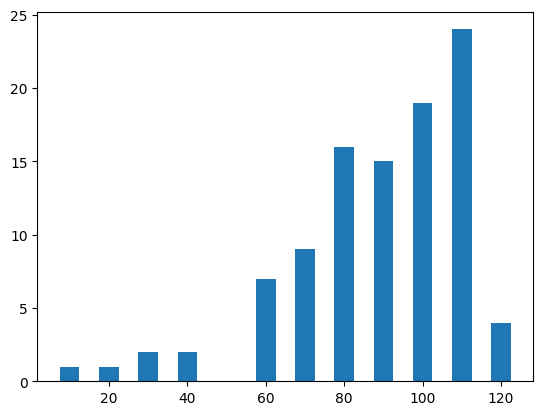

In [3]:
# bins from 0 to 150, step 10
bins = np.arange(0, 130, 10)

# Use numpy.histogram to get counts in each bin
counts, edges = np.histogram(scores, bins)

plt.bar(edges[1:], counts, width=5);

In [4]:
df.sort_values(['mark', 'total']).reset_index(drop=True).to_csv('has_hw1_5.csv')
df = pd.read_csv('has_hw1_5.csv', index_col=0)
df = df.fillna('no submit')

In [5]:
from tqdm import tqdm
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email(smtp_server, port, sender_email, password, recipient_email, subject, body):
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    server = smtplib.SMTP(smtp_server, port)
    server.starttls()
    server.login(sender_email, password)
    server.send_message(msg)
    server.quit()

smtp_server = 'smtp.gmail.com'
port = 587
sender_email = ''  # your email
password = ''  # your password
recipient_emails = []  # recipients' emails
subject = ''

for recipient in recipient_emails:
    send_email(smtp_server, port, sender_email, password, recipient, subject, body)